<a href="https://colab.research.google.com/github/Jessvcv/Statistical-Modeling-HW/blob/main/Tran_HW1_college.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
college_url = 'https://raw.githubusercontent.com/CDavisBelmont/college/main/College.csv'

In [ ]:
df = pd.read_csv(college_url)

In [ ]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
#A data dictionary for this dataset is found in the textbook section 2.4 problem 8 description

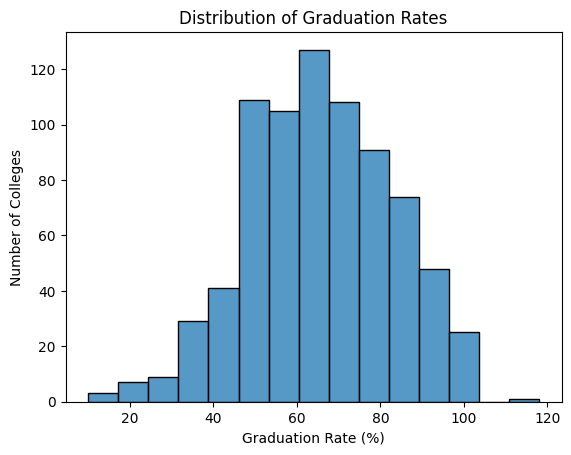

In [ ]:
#5. Suppose we want to predict graduation rates.
# Create a histogram of graduation rates for the entire dataset.

# Histogram of graduation rates
sns.histplot(df["Grad.Rate"], bins=15, kde=False)
plt.title("Distribution of Graduation Rates")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Number of Colleges")
plt.show()

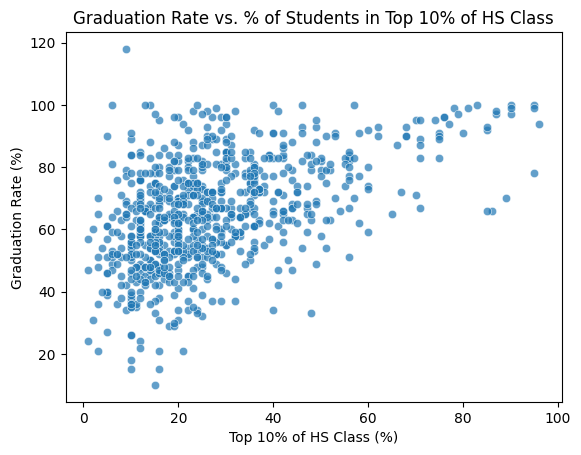

In [ ]:
#6. (1 point) Choose 1 other variable that you think might be informative and create
# a visualization that explores how that variable is related to graduation rate.

sns.scatterplot(data=df, x="Top10perc", y="Grad.Rate", alpha=0.7)
plt.title("Graduation Rate vs. % of Students in Top 10% of HS Class")
plt.xlabel("Top 10% of HS Class (%)")
plt.ylabel("Graduation Rate (%)")
plt.show()


In [ ]:
#7. Create two new dataframes – one that contains the colleges in the lowest quartile
# of graduation rates and one that contains the colleges in the top quartile.

# Q1 (25th percentile) and Q3 (75th percentile)
q1 = df["Grad.Rate"].quantile(0.25)
q3 = df["Grad.Rate"].quantile(0.75)

# Create DataFrames
low_grad = df[df["Grad.Rate"] <= q1]
high_grad = df[df["Grad.Rate"] >= q3]

print("Lowest Quartile of Graduation Rates:")
print(low_grad.head())

print("\nTop Quartile of Graduation Rates:")
print(high_grad.head())


Lowest Quartile of Graduation Rates:
                   Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
4   Alaska Pacific University     Yes   193     146      55         16   
9   Alderson-Broaddus College     Yes   582     498     172         21   
18         Andrews University     Yes  1130     704     322         14   
19    Angelo State University      No  3540    2001    1016         24   
20         Antioch University     Yes   713     661     252         25   

    Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
4          44          249          869      7560        4120    800   
9          44          799           78     10468        3380    660   
18         23         1586          326      9996        3090    900   
19         54         4190         1512      5130        3592    500   
20         44          712           23     15476        3336    400   

    Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
4       1500

In [ ]:
#8. Compute the basic statistics on both dataframes, what do you notice?
# Be sure to comment in particular on the predictor you observed in Q6.

# Summary statistics for lowest quartile
print("Lowest Quartile Statistics:")
print(low_grad.describe())

# Summary statistics for highest quartile
print("\nTop Quartile Statistics:")
print(high_grad.describe())

# Top10perc observation: Colleges with more top-performing students tend to have
# higher graduation rates. Also, the top quartile of graduation rates generally
# admit a higher proportion of academically strong students.

Lowest Quartile Statistics:
               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    198.000000    198.000000   198.000000  198.000000  198.000000   
mean    2197.136364   1604.227273   756.494949   17.449495   43.737374   
std     2360.047317   1656.600024   822.592699    9.455478   15.175512   
min      100.000000     90.000000    35.000000    1.000000    9.000000   
25%      582.500000    439.750000   196.250000   10.250000   33.000000   
50%     1214.000000    920.000000   392.000000   16.000000   42.500000   
75%     3029.750000   2245.250000  1045.250000   22.000000   53.000000   
max    12809.000000  10308.000000  4615.000000   56.000000   86.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    198.000000    198.000000    198.000000   198.000000   198.000000   
mean    3850.540404   1472.070707   7489.358586  3765.853535   560.969697   
std     4556.367215   2461.055814   2580.215235   882.941170   188.830784 

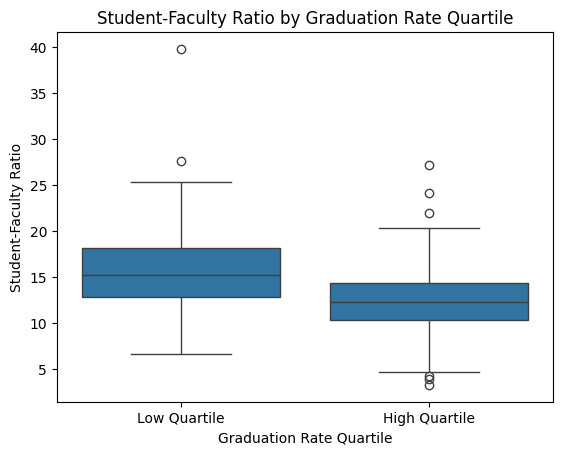

In [ ]:
#9. Create a visualization using the two dataframes in Q7 to highlight the
# differences in a different predictor of your choice.

# Add a GradGroup column
low_grad = low_grad.copy()
high_grad = high_grad.copy()

low_grad.loc[:, 'GradGroup'] = 'Low Quartile'
high_grad.loc[:, 'GradGroup'] = 'High Quartile'

# Combine for plotting
grad_comparison = pd.concat([low_grad, high_grad])

# Boxplot
sns.boxplot(x='GradGroup', y='S.F.Ratio', data=grad_comparison)
plt.title('Student-Faculty Ratio by Graduation Rate Quartile')
plt.xlabel('Graduation Rate Quartile')
plt.ylabel('Student-Faculty Ratio')
plt.show()



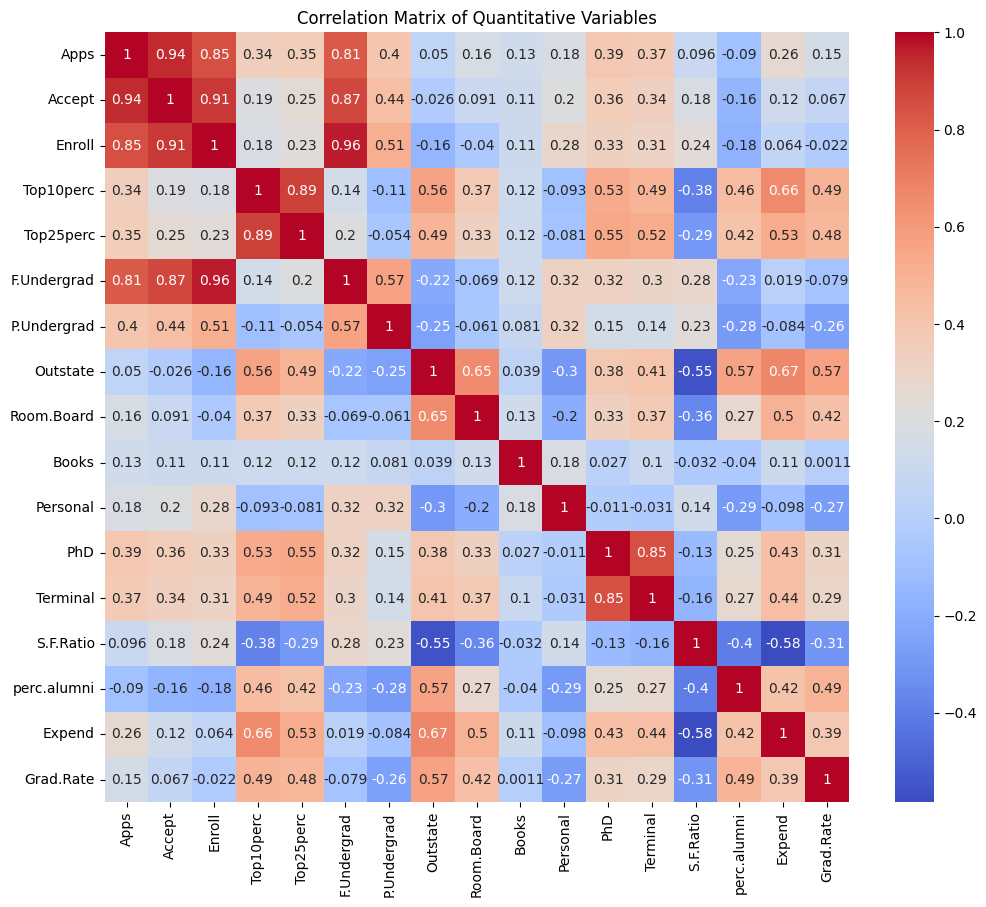

In [ ]:
#10. Create a correlation matrix using all quantitative variables,
# what trends do you identify?

# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Quantitative Variables")
plt.show()

#The heatmap shows a moderate positive relationship between top10 and top25
#percent and graduation rate. Addtionally, there is a moderate positive
#relationship between outstate and graduation rates. There is a moderate
#negative relationship between student faculty ratios and gradutation rate. Also,
#there is a strong positive correlation between enrollment and full time
#undergrad along with acceptance and enrollment.